<a href="https://colab.research.google.com/github/Sourav1429/Restricted_BNN/blob/main/RBNN_vanishing_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

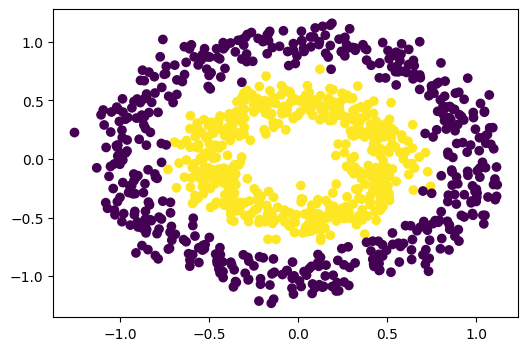

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Before training: Accuracy 0.5
After training: Accuracy 0.741
32/32 [==============================] - 0s 2ms/step - loss: 0.6331 - acc: 0.7410
[0.6330998539924622, 0.7409999966621399]


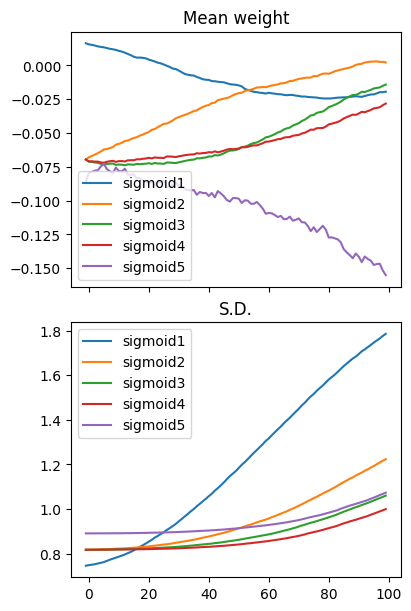

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

tf.random.set_seed(42)
np.random.seed(42)

# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Test performance with 3-layer binary classification network
model = Sequential([
    Input(shape=(2,)),
    Dense(5, "relu"),
    Dense(1, "sigmoid")
])

class WeightCapture(Callback):
    "Capture the weights of each layer of the model"
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.weights = []
        self.epochs = []

    def on_epoch_end(self, epoch, logs=None):
        self.epochs.append(epoch) # remember the epoch axis
        weight = {}
        for layer in model.layers:
            if not layer.weights:
                continue
            name = layer.weights[0].name.split("/")[0]
            weight[name] = layer.weights[0].numpy()
        self.weights.append(weight)
def make_mlp(activation, initializer, name):
    "Create a model with specified activation and initalizer"
    model = Sequential([
        Input(shape=(2,), name=name+"0"),
        Dense(5, activation=activation, kernel_initializer=initializer, name=name+"1"),
        Dense(5, activation=activation, kernel_initializer=initializer, name=name+"2"),
        Dense(5, activation=activation, kernel_initializer=initializer, name=name+"3"),
        Dense(5, activation=activation, kernel_initializer=initializer, name=name+"4"),
        Dense(1, activation="sigmoid", kernel_initializer=initializer, name=name+"5")
    ])
    return model

def plotweight(capture_cb):
    "Plot the weights' mean and s.d. across epochs"
    fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True, figsize=(4, 6))
    ax[0].set_title("Mean weight")
    for key in capture_cb.weights[0]:
        ax[0].plot(capture_cb.epochs, [w[key].mean() for w in capture_cb.weights], label=key)
    ax[0].legend()
    ax[1].set_title("S.D.")
    for key in capture_cb.weights[0]:
        ax[1].plot(capture_cb.epochs, [w[key].std() for w in capture_cb.weights], label=key)
    ax[1].legend()
    plt.show()

initializer = RandomNormal(mean=0, stddev=1)
batch_size = 32
n_epochs = 100

# Sigmoid activation
model = make_mlp("sigmoid", initializer, "sigmoid")
capture_cb = WeightCapture(model)
capture_cb.on_epoch_end(-1)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
print("Before training: Accuracy", accuracy_score(y, (model(X).numpy() > 0.5).astype(int)))
model.fit(X, y, batch_size=batch_size, epochs=n_epochs, callbacks=[capture_cb], verbose=0)
print("After training: Accuracy", accuracy_score(y, (model(X).numpy() > 0.5).astype(int)))
print(model.evaluate(X,y))
plotweight(capture_cb)

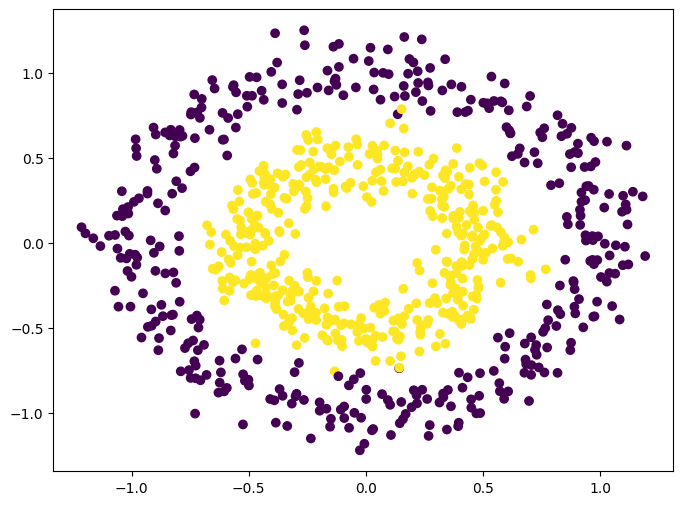

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
X,X_test,y,y_test = train_test_split(X,y,test_size = 0.2)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [2]:
len(y_test)

200

In [3]:
from tensorflow.keras.callbacks import Callback

class WeightCapture(Callback):
    "Capture the weights of each layer of the model"
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.weights = []
        self.epochs = []

    def on_epoch_end(self, epoch, logs=None):
        self.epochs.append(epoch) # remember the epoch axis
        weight = {}
        for layer in model.layers:
            if not layer.weights:
                continue
            name = layer.weights[0].name.split("/")[0]
            weight[name] = layer.weights[0].numpy()
        self.weights.append(weight)

In [5]:
def plotweight(capture_cb):
    "Plot the weights' mean and s.d. across epochs"
    fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True, figsize=(8, 10))
    ax[0].set_title("Mean weight")
    for key in capture_cb.weights[0]:
        ax[0].plot(capture_cb.epochs, [w[key].mean() for w in capture_cb.weights], label=key)
    ax[0].legend()
    ax[1].set_title("S.D.")
    for key in capture_cb.weights[0]:
        ax[1].plot(capture_cb.epochs, [w[key].std() for w in capture_cb.weights], label=key)
    ax[1].legend()
    plt.show()

In [6]:
import keras
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

7/7 [==============================] - 0s 2ms/step - loss: 0.6966 - acc: 0.6000
[0.6965757012367249, 0.6000000238418579]


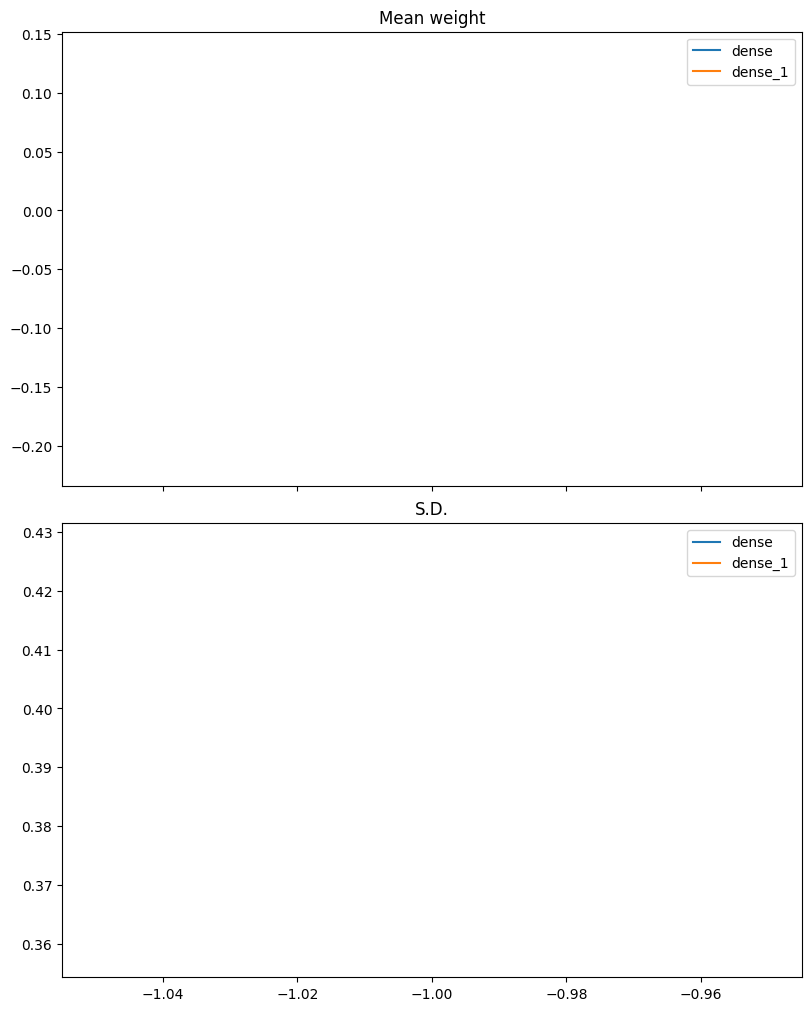

In [7]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
model = Sequential([
    Input(shape=(2,)),
    Dense(5, "sigmoid"),
    Dense(1, "sigmoid")
])
capture_cb = WeightCapture(model)
capture_cb.on_epoch_end(-1)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
history = LossHistory()
model.fit(X, y, batch_size=32, epochs=100, verbose=0,callbacks=[history])
print(model.evaluate(X_test,y_test))
plotweight(capture_cb)

In [ ]:
loss_values_ffnn = history.losses

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
def one_hot(y,n_output):
    y_ret = [];
    for i in y:
        val = np.zeros(n_output)
        val[i] = 1;
        y_ret.append(val);
    return np.array(y_ret)

In [12]:
def gen_weights(mu_mat,layer_wise_neurons,sigma):
    l = len(mu_mat)
    weights_by_layer = dict()
    for i in range(l):
        #print(type(i))
        #print(layer_wise_neurons)
        weights = np.zeros((layer_wise_neurons[i],layer_wise_neurons[i+1]))
        for j in range(layer_wise_neurons[i+1]):
            weights[:,j] = np.random.normal(mu_mat[i][j],sigma[i][j],layer_wise_neurons[i])
            weights[:,j] = weights[:,j]
        weights_by_layer[i] = weights
    return weights_by_layer

In [13]:
def activation(s,type_= 0):
    if(type_==1):
        return 1/(1+np.exp(-s))
    else:
        return np.where(s>=0,s,0)
def forward(weights_by_layers,x):
    l = len(weights_by_layers)
    a = x
    collected_weights = dict()
    for i in range(l):
        w = weights_by_layers[i]
        #print(w)
        #print("=======ok now========")
        #print(a)
        z = np.matmul(w.T,a)
        a = activation(z,1)
        #collected_weights[i] = a
    return a

In [25]:
def update(best_mu_mat,mu_mat,store,tot_err,chosen_index,gamma):
    val = np.sum(tot_err[chosen_index])
    mu_mat[0],mu_mat[1] = (1-gamma)*best_mu_mat[0],(1-gamma)*best_mu_mat[1]
    for i in range(len(chosen_index)):
        weights_dist = store[chosen_index[i]]
        err = tot_err[chosen_index[i]]
        #print("Error:",tot_err)
        for x in weights_dist:
            weights_dist[x] = weights_dist[x]*(err/val)
            mu_new = np.mean(weights_dist[x],axis=0)
            mu_mat[x] = mu_mat[x] + gamma*mu_new
    return mu_mat.copy()

In [28]:
class RBNN:
    def __init__(self,n_layers,mu_mat,nj_list,rho,alyer_wise_neurons,sigma):
        self.n_layers = n_layers
        self.mu_mat = mu_mat
        self.nj_list = nj_list
        self.rho = rho
        self.layer_wise_neurons = alyer_wise_neurons
        self.sigma_mat = sigma
        self.best_mu_mat = mu_mat
        self.best_acc = -1000000
    def activation(self,s):
        return np.where(s>=0,s,0)
    def error(self,y,y_hat):
      return -y*np.log(y_hat)-(1-y)*np.log(1-y_hat)
    def CEO(self,nj):
        store=[];tot_err=[];acc_list = []
        for j in range(nj):
            weights_by_layer = gen_weights(self.mu_mat,self.layer_wise_neurons,self.sigma_mat)
            store.append(weights_by_layer)
            error = 0
            acc = 0;
            for (x,y) in zip(self.X,self.y_):
                y_hat = forward(weights_by_layer,x)
                #print("Predicted:",y_hat)
                error = error + np.sum(self.error(y,y_hat))
                #print("predicted:",y_hat,"actual:",y)
                #input()
                acc = acc+ (np.round(y_hat)==y)
                #print("Yhat,error,acc:",y_hat,error,acc)
                #input()
            acc = acc/len(self.y_)
            tot_err.append(error/len(self.y_))
            acc_list.append(acc)
        acc_list,tot_err = np.array(acc_list),np.array(tot_err)
        #print(np.sort(tot_err))
        #print(np.argsort(tot_err))
        chosen_index = np.argsort(tot_err)[0:int(self.rho*nj)]
        #print("first chosen index",chosen_index)
        acc2 = np.mean(acc_list[chosen_index])
        self.mu_mat = update(self.best_mu_mat,self.mu_mat,store,tot_err,chosen_index,0.5)
        print("Mean matrix:",self.mu_mat)
        if(acc2>self.best_acc):
          self.best_mu_mat = self.mu_mat.copy()
          self.best_acc = acc2
        self.prev_mu_mat = self.mu_mat.copy()
        self.prev_acc = acc2
        return np.mean(tot_err[chosen_index]), acc2
    def train(self,X,y_):
        self.X = X
        self.y_ = y_
        err_plot,acc_plot=[],[]
        complete_mean_list = []
        for nj in tqdm(nj_list):
            train_err,acc = self.CEO(nj)
            print("Train error {}".format(train_err))
            print("Train accuracy {}".format(acc))
            err_plot.append(train_err)
            acc_plot.append(acc)
            complete_mean_list.append(self.mu_mat)
        #print("Before returning:",self.mu_mat)
        return err_plot,acc_plot,self.best_mu_mat,self.sigma_mat,complete_mean_list
    def predict(self,X,y_):
        weights_by_layer = gen_weights(self.mu_mat,self.layer_wise_neurons,self.sigma_mat)
        #print("weights: by :",weights_by_layer)
        #print("input:",X)
        y_hat = forward(weights_by_layer,X)
        print("Actual output:{} and predicted ouput:{}".format(y_,y_hat))
        return y_==y_hat

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
nj_list = np.arange(100,600,20)
rho = 0.1
n_features = 2
n_output = 1
y = np.reshape(y,(len(y),1))
layer_wise_neurons = [n_features,5,n_output]
mu_mat = []
sigma_mat = []
for i in range(len(layer_wise_neurons)-1):
    mu_mat.append(np.zeros(layer_wise_neurons[i+1]))
    sigma_mat.append(np.ones(layer_wise_neurons[i+1])*1)
print(mu_mat)
#mu_mat = np.array(mu_mat)
#sigma_mat = np.array(sigma_mat)
#print(mu_mat)
model2 = RBNN(len(layer_wise_neurons),mu_mat,nj_list,rho,layer_wise_neurons,sigma_mat)
err_plot,acc_plot,mu_mat,sigma_mat,complete_mean_list = model2.train(X_new,y)

[array([0., 0., 0., 0., 0.]), array([0.])]


  4%|▍         | 1/25 [00:03<01:24,  3.52s/it]

Mean matrix: [array([ 0.16818511,  0.00120314, -0.1676503 , -0.04797505,  0.02038135]), array([0.00948811])]
Train error 0.7010508669960082
Train accuracy 0.9493999999999998


  8%|▊         | 2/25 [00:08<01:45,  4.61s/it]

Mean matrix: [array([ 0.16512128, -0.07078971, -0.0929886 , -0.11102837,  0.18060087]), array([0.0174457])]
Train error 0.7052982266973191
Train accuracy 0.927


 12%|█▏        | 3/25 [00:13<01:44,  4.76s/it]

Mean matrix: [array([ 0.28033855, -0.08378024, -0.05021204,  0.00430927,  0.06144627]), array([0.00781144])]
Train error 0.7030726868668912
Train accuracy 0.9292857142857143


 16%|█▌        | 4/25 [00:20<01:54,  5.43s/it]

Mean matrix: [array([ 0.16237134,  0.08239552, -0.01989904, -0.00709614,  0.28632247]), array([0.00172197])]
Train error 0.6999652739964737
Train accuracy 0.9234374999999999


 20%|██        | 5/25 [00:26<01:55,  5.77s/it]

Mean matrix: [array([ 0.1129937 , -0.03456599, -0.06565399,  0.02715344,  0.19477097]), array([0.01018212])]
Train error 0.7030826907105465
Train accuracy 0.94


 24%|██▍       | 6/25 [00:34<02:03,  6.49s/it]

Mean matrix: [array([ 0.10106995, -0.11637776, -0.19430335,  0.06031258,  0.20619013]), array([0.01384502])]
Train error 0.7031392956413237
Train accuracy 0.9298500000000001


 28%|██▊       | 7/25 [00:42<02:04,  6.92s/it]

Mean matrix: [array([ 0.20261974,  0.0110216 , -0.13058357,  0.03797433,  0.23916421]), array([0.01402309])]
Train error 0.7079747625012847
Train accuracy 0.9329999999999998


 32%|███▏      | 8/25 [00:51<02:11,  7.72s/it]

Mean matrix: [array([ 0.10050271, -0.13300459, -0.01431538,  0.01182635, -0.06915474]), array([-0.00647911])]
Train error 0.703270936074377
Train accuracy 0.9159583333333333


 36%|███▌      | 9/25 [01:01<02:14,  8.43s/it]

Mean matrix: [array([ 0.14100596, -0.10296409, -0.02540076,  0.00583465, -0.02967717]), array([0.00664622])]
Train error 0.7054295091076188
Train accuracy 0.9369615384615384


 40%|████      | 10/25 [01:12<02:17,  9.20s/it]

Mean matrix: [array([ 0.15967946, -0.02593754, -0.17943544,  0.05083978, -0.0190049 ]), array([0.01189396])]
Train error 0.703451714267367
Train accuracy 0.924607142857143


 44%|████▍     | 11/25 [01:24<02:18,  9.90s/it]

Mean matrix: [array([ 0.26018759,  0.01606939, -0.17301042, -0.04453458, -0.05882212]), array([0.0015916])]
Train error 0.7054853394960537
Train accuracy 0.9155333333333333


 48%|████▊     | 12/25 [01:36<02:18, 10.62s/it]

Mean matrix: [array([ 0.16359219, -0.00554438, -0.14058194, -0.00150337,  0.13603841]), array([-0.00040324])]
Train error 0.702152973752424
Train accuracy 0.9199375000000001


 52%|█████▏    | 13/25 [01:49<02:15, 11.27s/it]

Mean matrix: [array([ 0.07658104,  0.06903801, -0.18276004, -0.03900361,  0.04210431]), array([-0.00658143])]
Train error 0.7054546011417326
Train accuracy 0.9092352941176471


 56%|█████▌    | 14/25 [02:02<02:11, 11.98s/it]

Mean matrix: [array([ 0.06168311,  0.00288514, -0.22992016, -0.12053278, -0.04218444]), array([0.00877914])]
Train error 0.7031859798987895
Train accuracy 0.9394722222222223


 60%|██████    | 15/25 [02:17<02:06, 12.66s/it]

Mean matrix: [array([ 0.12732731,  0.06142465, -0.03027317,  0.03388855,  0.0014683 ]), array([0.00923292])]
Train error 0.7011078517239652
Train accuracy 0.930421052631579


 64%|██████▍   | 16/25 [02:31<01:59, 13.31s/it]

Mean matrix: [array([0.21481848, 0.00521345, 0.0400994 , 0.07972658, 0.0859631 ]), array([0.0103619])]
Train error 0.7035112460973234
Train accuracy 0.934275


 68%|██████▊   | 17/25 [02:47<01:52, 14.02s/it]

Mean matrix: [array([ 0.26033197, -0.00650343, -0.0382975 , -0.03365649,  0.04434248]), array([0.00651588])]
Train error 0.7036498824872994
Train accuracy 0.9363809523809523


 72%|███████▏  | 18/25 [03:04<01:44, 14.97s/it]

Mean matrix: [array([ 0.13497378, -0.00532559, -0.04349411, -0.00783007,  0.04191788]), array([0.00806307])]
Train error 0.7018706841351109
Train accuracy 0.9339545454545455


 76%|███████▌  | 19/25 [03:21<01:33, 15.58s/it]

Mean matrix: [array([ 0.09976182,  0.16453394, -0.13442611, -0.02295014,  0.10948998]), array([-0.00219273])]
Train error 0.7047772184106226
Train accuracy 0.9193260869565217


 80%|████████  | 20/25 [03:42<01:25, 17.19s/it]

Mean matrix: [array([ 0.10496116,  0.02613171, -0.14514955,  0.04821278,  0.08358092]), array([0.00740565])]
Train error 0.7044030824689044
Train accuracy 0.9374583333333333


 84%|████████▍ | 21/25 [04:01<01:10, 17.58s/it]

Mean matrix: [array([ 0.20192223, -0.0137868 , -0.12243469,  0.04728237,  0.03971897]), array([0.0004925])]
Train error 0.704116595758708
Train accuracy 0.93604


 88%|████████▊ | 22/25 [04:21<00:55, 18.39s/it]

Mean matrix: [array([ 0.10184597,  0.04922855, -0.22480986,  0.01846109, -0.01217846]), array([0.00310366])]
Train error 0.7049891894577363
Train accuracy 0.9238076923076923


 92%|█████████▏| 23/25 [04:41<00:37, 18.89s/it]

Mean matrix: [array([ 0.12064555,  0.07485109, -0.18685545,  0.02052381,  0.02445423]), array([0.0081174])]
Train error 0.7010331908600628
Train accuracy 0.9301296296296298


 96%|█████████▌| 24/25 [05:02<00:19, 19.61s/it]

Mean matrix: [array([ 0.11772032, -0.0176393 , -0.16328425,  0.00986176,  0.05401463]), array([0.00343525])]
Train error 0.7051976474831099
Train accuracy 0.9174285714285715


100%|██████████| 25/25 [05:24<00:00, 13.00s/it]

Mean matrix: [array([ 0.10715256, -0.04026845, -0.22080536,  0.02149423,  0.09525589]), array([0.00384529])]
Train error 0.7026712873828346
Train accuracy 0.9242068965517242


In [31]:
import pandas as pd
dict_for_error = {'RBNN':err_plot}
df = pd.DataFrame(dict_for_error)
df.to_excel('VG_loss_Restricted_BNN.xlsx')

In [33]:
lisA,lisB,lisC,lisD,lisE,lisF = [],[],[],[],[],[]
for i in range(len(complete_mean_list)):
  a,b,c,d,e,f = complete_mean_list[i][0][0],complete_mean_list[i][0][1],complete_mean_list[i][0][2],complete_mean_list[i][0][3],complete_mean_list[i][0][4],complete_mean_list[i][1][0]
  lisA.append(a)
  lisB.append(b)
  lisC.append(c)
  lisD.append(d)
  lisE.append(e)
  lisF.append(f)

Text(0.5, 1.0, 'The mean values being updated after every epoch unlike FFNN')

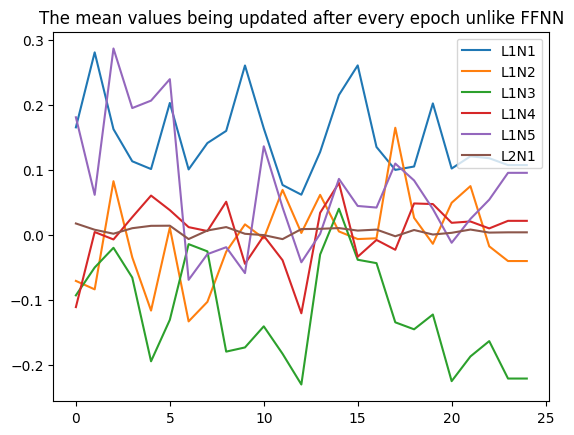

In [34]:
plt.plot(lisA)
plt.plot(lisB)
plt.plot(lisC)
plt.plot(lisD)
plt.plot(lisE)
plt.plot(lisF)
plt.legend(['L1N1','L1N2','L1N3','L1N4','L1N5','L2N1'])
plt.title('The mean values being updated after every epoch unlike FFNN')

Text(0.5, 1.0, 'The mean values being updated after every epoch unlike FFNN')

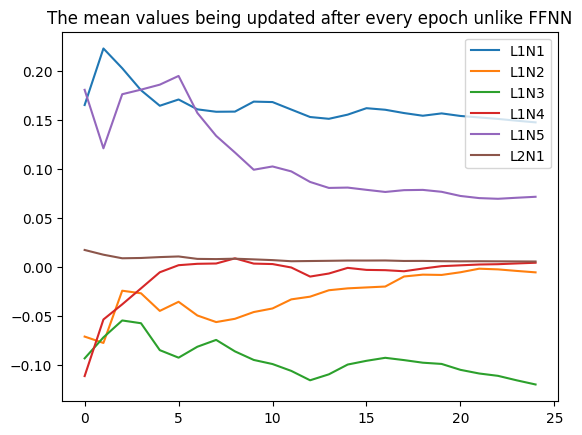

In [36]:
plt.plot(np.cumsum(lisA)/np.arange(1,26))
plt.plot(np.cumsum(lisB)/np.arange(1,26))
plt.plot(np.cumsum(lisC)/np.arange(1,26))
plt.plot(np.cumsum(lisD)/np.arange(1,26))
plt.plot(np.cumsum(lisE)/np.arange(1,26))
plt.plot(np.cumsum(lisF)/np.arange(1,26))
plt.legend(['L1N1','L1N2','L1N3','L1N4','L1N5','L2N1'])
plt.title('The mean values being updated after every epoch unlike FFNN')